### 1. MNIST Digits

MNIST 손글씨 이미지를 딥러닝을 이용하여 분류하시오.

In [64]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (X_test, y_test) = mnist.load_data()
(X1, y1), (X1_test, y1_test) = mnist.load_data()

In [65]:
(X, y), (X_test, y_test) = mnist.load_data()
y=to_categorical(y)
y_test=to_categorical(y_test)

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

# preprocessing
X = X.reshape((60000, 28*28))
X = X/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [66]:
X.shape, X_test.shape, y.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [67]:
net.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_37 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [68]:
net.fit(X, y, epochs=1, batch_size=128)

469/469 [==============================] - 10s 21ms/step - loss: 0.2101 - acc: 0.9350


In [69]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0987 - acc: 0.9689


In [70]:
X_val = X[:10000]
partial_X = X[10000:]

y_val = y[:10000]
partial_y = y[10000:]

In [43]:
val = net.fit(partial_X,partial_y,epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 9s 23ms/step - loss: 0.0765 - acc: 0.9757 - val_loss: 0.1086 - val_acc: 0.9639
Epoch 2/20
391/391 [==============================] - 9s 23ms/step - loss: 0.0517 - acc: 0.9836 - val_loss: 0.0730 - val_acc: 0.9781
Epoch 3/20
391/391 [==============================] - 9s 24ms/step - loss: 0.0373 - acc: 0.9879 - val_loss: 0.0632 - val_acc: 0.9797
Epoch 4/20
391/391 [==============================] - 9s 23ms/step - loss: 0.0284 - acc: 0.9903 - val_loss: 0.0768 - val_acc: 0.9787
Epoch 5/20
391/391 [==============================] - 8s 22ms/step - loss: 0.0260 - acc: 0.9914 - val_loss: 0.0699 - val_acc: 0.9807
Epoch 6/20
391/391 [==============================] - 9s 23ms/step - loss: 0.0201 - acc: 0.9932 - val_loss: 0.0848 - val_acc: 0.9787
Epoch 7/20
391/391 [==============================] - 9s 22ms/step - loss: 0.0194 - acc: 0.9938 - val_loss: 0.0692 - val_acc: 0.9827
Epoch 8/20
391/391 [==============================] - 10s 24ms/step -

In [44]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

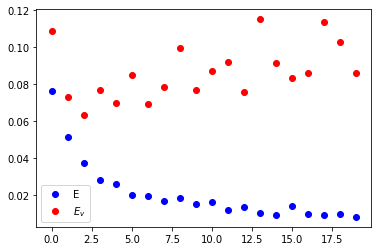

In [45]:
x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

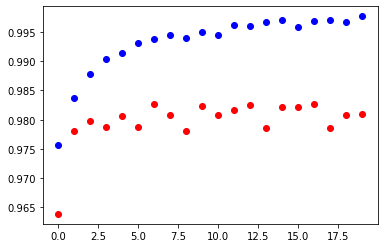

In [46]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [47]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax')) 
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [48]:
val2= model.fit(partial_X,partial_y,epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 7s 19ms/step - loss: 0.3799 - acc: 0.8836 - val_loss: 0.1343 - val_acc: 0.9593
Epoch 2/20
391/391 [==============================] - 7s 18ms/step - loss: 0.1711 - acc: 0.9484 - val_loss: 0.1054 - val_acc: 0.9676
Epoch 3/20
391/391 [==============================] - 7s 18ms/step - loss: 0.1335 - acc: 0.9593 - val_loss: 0.0910 - val_acc: 0.9723
Epoch 4/20
391/391 [==============================] - 7s 18ms/step - loss: 0.1115 - acc: 0.9645 - val_loss: 0.0815 - val_acc: 0.9758
Epoch 5/20
391/391 [==============================] - 6s 17ms/step - loss: 0.0970 - acc: 0.9692 - val_loss: 0.0806 - val_acc: 0.9753
Epoch 6/20
391/391 [==============================] - 8s 20ms/step - loss: 0.0883 - acc: 0.9724 - val_loss: 0.0735 - val_acc: 0.9778
Epoch 7/20
391/391 [==============================] - 8s 19ms/step - loss: 0.0789 - acc: 0.9745 - val_loss: 0.0689 - val_acc: 0.9791
Epoch 8/20
391/391 [==============================] - 8s 20ms/step - 

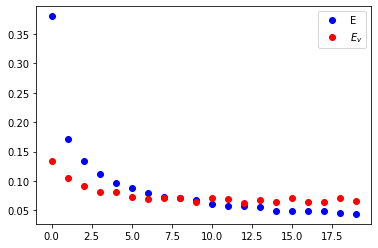

In [49]:
val_dict = val2.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

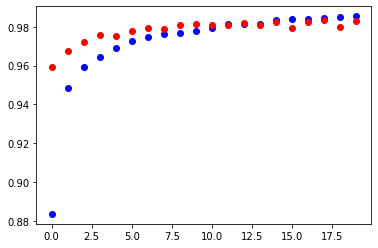

In [50]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [51]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1040 - acc: 0.9789


In [52]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0628 - acc: 0.9835


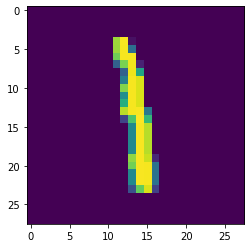

In [76]:
plt.imshow(X1_test[29])

In [77]:
np.argmax(net.predict(X_test)[29])

1

결론 : Accuracy가 0.935로 높은 수치임을 확인 할 수있습니다   MNIST가 dropout 할 경우 loss가 0.04 줄었으며 Accuracy가 0.0046 높아 진것을 확인 할 수있습니다.